Get packages we will need.  

Numpy contains many basic tools such as exponential functions and generating an array.  Matplotlib is used for its plotting packages. Scipy is used for its fitting packages.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

Define a Gaussian function. 

In [0]:
## Define Gaussian function f
# x = x coordinates
# a = peak height parameter
# b = offset along the x axis
# c = width parameter
def f(x,a,b,c):
  """ Gaussian """
  return a*np.exp((-0.5)*(x-b)**2/c**2)

## Generate a Gaussian dataset
x = np.linspace(0,20,101) # xcoordinate
a = 30.  # peak
b = 10.  # xoffset
c = 2.   # width
ygauss = f(x,a,b,c)

Add error so that our data will be realistic and harder to fit.

In [0]:
## Generate error, assuming normally distributed/gaussian errors

# pick a seed from which to generate error
np.random.seed(1230497) 
# generate error values centered around 0, with a width 1.5, with the same number of values as array x
yerr = np.random.normal(0,1.5,size=len(x))
# combine our Gaussian with error values
y = ygauss + yerr

Plot it

Text(1,28,u'How do I fit this?')

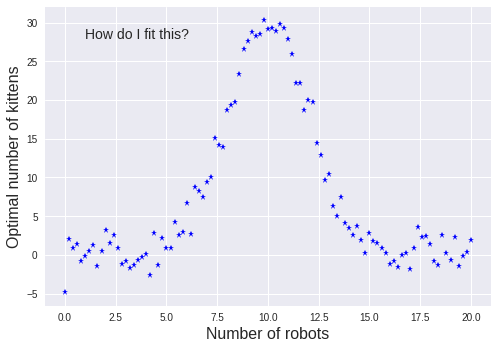

In [23]:
plt.plot(x,y,'b*')
plt.xlabel("Number of robots",fontsize=16)
plt.ylabel("Optimal number of kittens",fontsize=16)
plt.text(1,28,"How do I fit this?",fontsize=14)

First attempt at model fit

In [24]:
params, pcovar = sp.optimize.curve_fit(f,x,y)
params, pcovar

(array([2.7286189 , 2.18264065, 0.24605613]),
 array([[ 1.14840667e+02, -2.68108037e-04, -6.90289226e+00],
        [-2.68108037e-04,  1.24526048e+00,  4.51868650e-05],
        [-6.90289226e+00,  4.51868650e-05,  1.24497209e+00]]))

Params contains the [peak height, the xoffset, and the width]. The pcovar variable contains the covariance matrix that shares how related the params are to each other.

Text(0.5,0.05,u'More words with relative positioning')

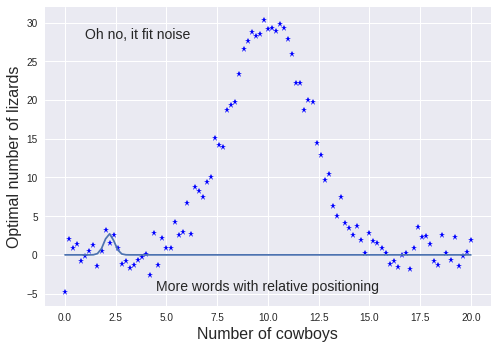

In [25]:
#plot as before
plt.plot(x,y,'b*')
plt.xlabel("Number of cowboys",fontsize=16)
plt.ylabel("Optimal number of lizards",fontsize=16)
#newline # By inputing *params, each element of the array is fed in to the function one at a time 
plt.plot(x,f(x,*params))
plt.text(1,28,"Oh no, it fit noise",fontsize=14)
plt.text(0.5,.05,"More words with relative positioning",fontsize=14,transform=plt.gca().transAxes,ha="center")

Best practice for fitting programs is to generally start fitting with an estimate of the fit parameters, to encourage the program to find the feature you want and make sure you don't fall into any local features like we just did. The guess doesn't have to be right, approximate works just fine.

In [26]:
# param format = [height, xoffset, width]
guess = [25,9,2]
params, pcovar = sp.optimize.curve_fit(f,x,y,p0=guess)
params # much closer to our original values

array([30.25035941, 10.01375306,  1.99007389])

Great, those values looks much closer.

Text(5,-4,u'height=30.3 xoffset=10.0 width=1.99')

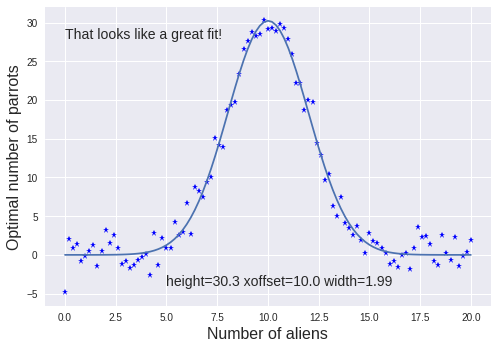

In [27]:
#plot as before
plt.plot(x,y,'b*')
plt.xlabel("Number of aliens",fontsize=16)
plt.ylabel("Optimal number of parrots",fontsize=16)
#newline
plt.plot(x,f(x,*params))
plt.text(0,28,"That looks like a great fit!",fontsize=14)
#add our parameters to the plot so that it is easy to read.
#  The formating of the numbers is %(total n#characters).(#characters after decimal point)f 
#     xpos,ypox, input character string with spaces for params to be input, fontsize
plt.text(5, -4,"height=%4.1f xoffset=%4.1f width=%4.2f" % tuple(params), fontsize=14 )

To see if there are any systematic residual signals left after fitting, try subtracting your fit from the data.

Text(3,-4.3,u'The residuals are evenly scattered around 0.')

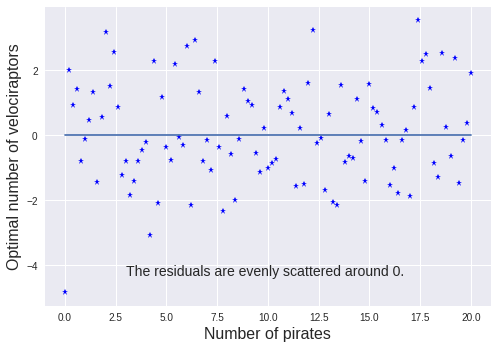

In [28]:
residual = y-f(x,*params)
#plot as before
plt.plot( x, residual, 'b*')
plt.xlabel( "Number of pirates", fontsize=16)
plt.ylabel( "Optimal number of velociraptors", fontsize=16)
#plot a line through zero for reference (y-y = 0.)
plt.plot( x, y-y)
plt.text(3,-4.3,"The residuals are evenly scattered around 0.",fontsize=14)